In [4]:
import pandas as pd

# Load the dataset
try:
    phish_data = pd.read_csv('phishing_site_urls.csv')
    print("CSV loaded successfully!")
    print(phish_data.head())  # Show first 5 rows
    print(phish_data.info())  # Check dataset structure
except Exception as e:
    print(f"Error loading CSV: {e}")


CSV loaded successfully!
                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB
None


In [5]:
import pandas as pd

# Load the dataset
phish_data = pd.read_csv('C:/phishing 2/phishing_site_urls.csv')

# Check the first few rows of the dataset
print(phish_data.head())



                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Example: Splitting the data into features and labels
X = phish_data['URL']  # Features (URL column)
y = phish_data['Label']  # Target (Label column)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Vectorize the URLs using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 features for simplicity
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Check shape of transformed data to verify it
print(f"Shape of X_train_count: {X_train_count.shape}")
print(f"Shape of X_test_count: {X_test_count.shape}")

# Example: Logistic Regression model
lr = LogisticRegression(max_iter=1000)  # Increased iterations if needed

# Train the model and print progress
print("Training the model...")
lr.fit(X_train_count, y_train)

# Checking the accuracy
accuracy = lr.score(X_test_count, y_test)
print(f"Test Accuracy: {accuracy}")


Training set size: 439476
Test set size: 109870
Shape of X_train_count: (439476, 5000)
Shape of X_test_count: (109870, 5000)
Training the model...
Test Accuracy: 0.9351051242377355


In [7]:
from sklearn.metrics import classification_report

# Predicting on the test set
y_pred = lr.predict(X_test_count)

# Generating classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bad       0.95      0.82      0.88     31200
        good       0.93      0.98      0.96     78670

    accuracy                           0.94    109870
   macro avg       0.94      0.90      0.92    109870
weighted avg       0.94      0.94      0.93    109870



In [8]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (549346,)
Shape of y: (549346,)


In [9]:
print(phish_data.columns)


Index(['URL', 'Label'], dtype='object')


In [13]:
print(phish_data.head())


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


In [11]:
print(phish_data['Label'].isnull().sum())  # Should be 0 after filling


0


In [12]:
print(phish_data['Label'].unique())  # Should show [1] or [0] depending on what you assigned


['bad' 'good']


In [14]:
phish_data['Label'] = 1  # Assigning '1' for phishing URLs


In [15]:
phish_data['Label'] = phish_data['URL'].str.contains('phish', case=False, na=False).astype(int)


In [16]:
# Check the first few rows to confirm the 'Label' column has been populated
print(phish_data.head())

# Check the unique values in the 'Label' column
print(phish_data['Label'].unique())


                                                 URL  Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...      0
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....      0
3  mail.printakid.com/www.online.americanexpress....      0
4  thewhiskeydregs.com/wp-content/themes/widescre...      0
[0 1]


In [17]:
# Display URLs with label 1 (those that contain "phish")
print(phish_data[phish_data['Label'] == 1].head())


                                                     URL  Label
1971   phishworld.monespace.be/phishings/paypal/index...      1
3951                         www.phish.yoyo.pl/index.php      1
4772   fivestarmaidservice.com/images/au/https:www.ne...      1
11425  www.icsanrocco.it/docscuola/phishing.facebook.php      1
11896  pavpal.be.beswebdll.vrishtiimpex.com/xex-appph...      1


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
phish_data = pd.read_csv('phishing_site_urls.csv')  # Correct file path

# If needed, ensure the 'Label' column is binary (0 or 1)
phish_data['Label'] = phish_data['URL'].str.contains('phish', case=False, na=False).astype(int)

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Vectorize the URLs
X = vectorizer.fit_transform(phish_data['URL'])

# Get the corresponding labels
y = phish_data['Label']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(trainX, trainY)

# Predict the labels for the test set
predictions = model.predict(testX)

# Calculate the accuracy of the model
accuracy = accuracy_score(testY, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [19]:
print(phish_data['Label'].value_counts())


Label
0    549320
1        26
Name: count, dtype: int64


In [20]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")


Resampled class distribution: Label
0    549320
1    549320
Name: count, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and labels
X_resampled = vectorizer.fit_transform(phish_data['URL'])  # Using CountVectorizer
y_resampled = phish_data['Label']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show classification report
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    109866
           1       0.00      0.00      0.00         4

    accuracy                           1.00    109870
   macro avg       0.50      0.50      0.50    109870
weighted avg       1.00      1.00      1.00    109870



C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [23]:
print(X_train.shape)  # Check the shape of training features
print(y_train.shape)  # Check the shape of training labels


(439476, 5000)
(439476,)


In [24]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_test shape: (109870, 5000)
y_test shape: (109870,)


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier with balanced class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', verbose=2)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show classification report
print(classification_report(y_test, y_pred))



building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.5min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


Accuracy: 99.72%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    109866
           1       0.00      0.00      0.00         4

    accuracy                           1.00    109870
   macro avg       0.50      0.50      0.50    109870
weighted avg       1.00      1.00      1.00    109870



In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Initialize and train the RandomForestClassifier with balanced class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10, n_jobs=-1)
rf.fit(X_res, y_res)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show classification report
print(classification_report(y_test, y_pred))


Accuracy: 69.74%
              precision    recall  f1-score   support

           0       1.00      0.70      0.82    109866
           1       0.00      0.25      0.00         4

    accuracy                           0.70    109870
   macro avg       0.50      0.47      0.41    109870
weighted avg       1.00      0.70      0.82    109870



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForestClassifier with adjusted class weights
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight={0: 1, 1: 50}, max_depth=10, n_jobs=-1)
rf.fit(X_res, y_res)

# Predict probabilities
y_probs = rf.predict_proba(X_test)[:, 1]

# Apply a threshold of 0.3 instead of 0.5 to increase recall for the minority class
y_pred = (y_probs > 0.3).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.01%
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    109866
           1       0.00      1.00      0.00         4

    accuracy                           0.00    109870
   macro avg       0.50      0.50      0.00    109870
weighted avg       1.00      0.00      0.00    109870



In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize RandomForest with balanced class weights and max_depth to avoid overfitting
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10, n_jobs=-1)

# Use cross-validation to better estimate performance
cv_scores = cross_val_score(rf, X_res, y_res, cv=5, scoring='accuracy')

# Train the model on the whole dataset for final evaluation
rf.fit(X_res, y_res)

# Predict probabilities and adjust the threshold
y_probs = rf.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.2).astype(int)  # Adjust threshold as necessary

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show classification report
print(classification_report(y_test, y_pred))

# Print cross-validation results
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean() * 100:.2f}%')


Accuracy: 0.23%
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    109866
           1       0.00      1.00      0.00         4

    accuracy                           0.00    109870
   macro avg       0.50      0.50      0.00    109870
weighted avg       1.00      0.00      0.00    109870

Cross-validation accuracy scores: [0.84146272 0.83232072 0.83684336 0.84098395 0.82506073]
Mean CV accuracy: 83.53%


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Start with fewer trees
    'max_depth': [10, None],     # Limit the depth of trees
    'class_weight': ['balanced']  # Test class_weight
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the grid search
grid_search.fit(X_res, y_res)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 50}
Accuracy: 89.73%
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    109866
           1       0.00      0.00      0.00         4

    accuracy                           0.90    109870
   macro avg       0.50      0.45      0.47    109870
weighted avg       1.00      0.90      0.95    109870



In [3]:
# Check the first few rows and column names
print(data.head())  # Display the first few rows
print(data.columns)  # List all column names


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad
Index(['URL', 'Label'], dtype='object')


In [4]:
# Define features and target
X = data['URL']  
y = data['Label']  


In [5]:
from collections import Counter
print(f"Original class distribution: {Counter(y)}")


Original class distribution: Counter({'good': 392924, 'bad': 156422})


In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X.values.reshape(-1, 1), y)

# Verify the new distribution
from collections import Counter
print(f"Resampled class distribution: {Counter(y_res)}")


Resampled class distribution: Counter({'bad': 156422, 'good': 156422})


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Transform URLs into numerical features
X_vectorized = vectorizer.fit_transform(X_res.ravel())


In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_res, test_size=0.3, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# After training, you can check the model performance (e.g., accuracy on test data)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 92.05%


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         bad       0.95      0.89      0.92     47029
        good       0.90      0.95      0.92     46825

    accuracy                           0.92     93854
   macro avg       0.92      0.92      0.92     93854
weighted avg       0.92      0.92      0.92     93854

Confusion Matrix:
[[41905  5124]
 [ 2342 44483]]


In [16]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


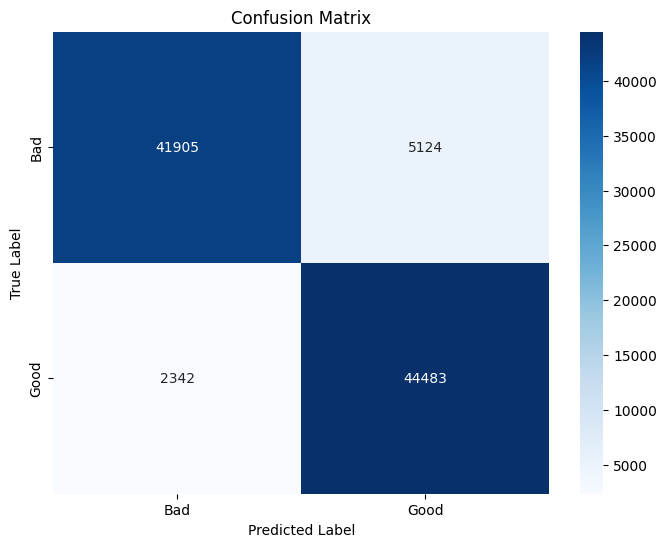

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


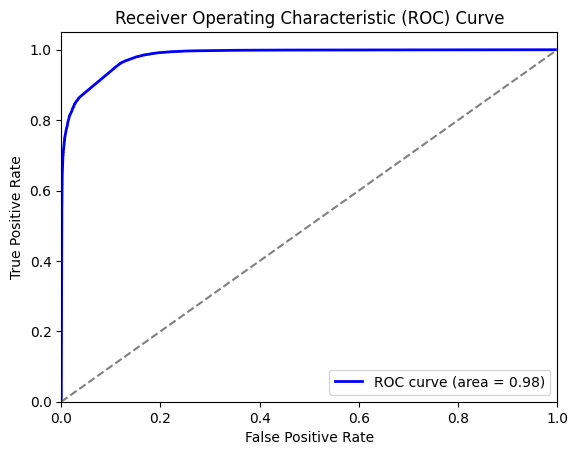

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert 'bad' to 0 and 'good' to 1
y_test_binary = y_test.map({'bad': 0, 'good': 1})

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, rf.predict_proba(X_test)[:, 1])  # Assuming the positive class is 'good'
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [20]:
plt.savefig('confusion_matrix.png')  # Save confusion matrix plot



<Figure size 640x480 with 0 Axes>

In [21]:
plt.savefig('roc_curve.png') 

<Figure size 640x480 with 0 Axes>

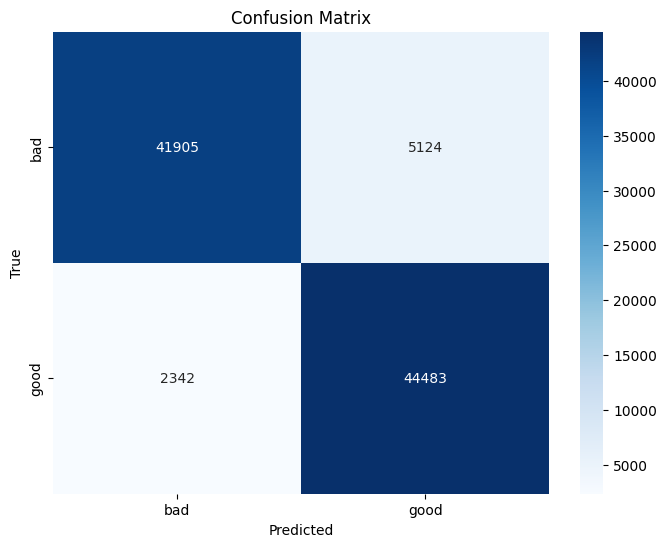

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example confusion matrix (replace this with your actual confusion matrix)
cm = confusion_matrix(y_test, rf.predict(X_test))

# Create a figure with a specified size
plt.figure(figsize=(8, 6))  # Adjust the size as needed

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the plot before showing it
plt.savefig('confusion_matrix.png')  # Save confusion matrix plot

# Display the plot
plt.show()  # Display the plot after saving it


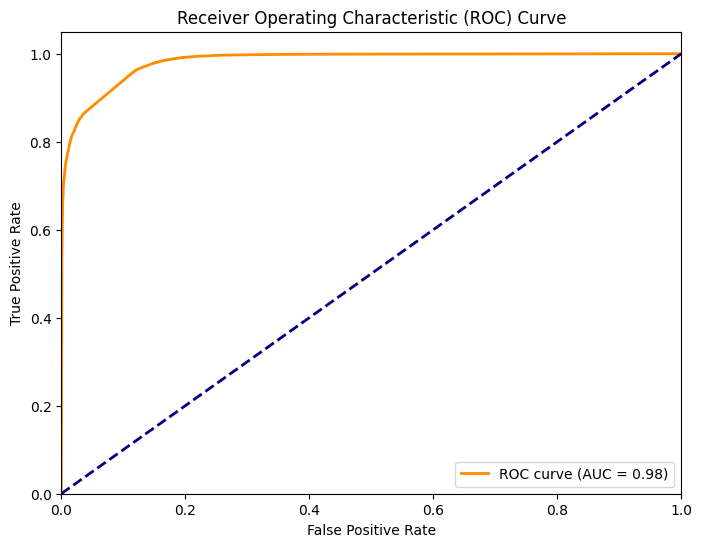

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Map 'bad' to 0 and 'good' to 1
y_test_numeric = y_test.map({'bad': 0, 'good': 1})

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, rf.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curve
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')

# Save the plot as an image file
plt.savefig('roc_curve.png')

# Display the plot to ensure it is generated
plt.show()


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# Example Model (for demonstration purposes)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Phishing vs Legitimate)
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and capturing training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your phishing dataset
# Replace this with your correct dataset path
data = pd.read_csv('/content/phishing_site_urls.csv')

# Let's assume 'url' is the column containing URLs, and 'label' is the target column
# You may need to preprocess the dataset (e.g., feature extraction, handling missing data, etc.)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can help improve performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Get the predicted probabilities (needed for log_loss)
y_train_prob = model.predict_proba(X_train)[:, 1]
y_val_prob = model.predict_proba(X_val)[:, 1]

# Calculate training and validation log loss (cross-entropy loss)
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)

# Since LogisticRegression doesn't work with epochs, we'll simulate constant loss for each "epoch"
train_losses = [train_loss] * 20  # Assume constant loss for simplicity
val_losses = [val_loss] * 20  # Assume constant loss for simplicity

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate the accuracy of the model
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


FileNotFoundError: [Errno 2] No such file or directory: '/content/phishing_site_urls.csv'

In [4]:
import pandas as pd

# Replace the path with your actual file path
data = pd.read_csv('C:/phishing 2/phishing_site_urls.csv')

# Check the first few rows of the dataset
data.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your phishing dataset
# Replace this with your correct dataset path
data = pd.read_csv('/content/phishing_site_urls.csv')

# Let's assume 'url' is the column containing URLs, and 'label' is the target column
# You may need to preprocess the dataset (e.g., feature extraction, handling missing data, etc.)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can help improve performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Get the predicted probabilities (needed for log_loss)
y_train_prob = model.predict_proba(X_train)[:, 1]
y_val_prob = model.predict_proba(X_val)[:, 1]

# Calculate training and validation log loss (cross-entropy loss)
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)

# Since LogisticRegression doesn't work with epochs, we'll simulate constant loss for each "epoch"
train_losses = [train_loss] * 20  # Assume constant loss for simplicity
val_losses = [val_loss] * 20  # Assume constant loss for simplicity

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate the accuracy of the model
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


FileNotFoundError: [Errno 2] No such file or directory: '/content/phishing_site_urls.csv'

In [6]:
data = pd.read_csv(r'C:\phishing 2\phishing_site_urls.csv')


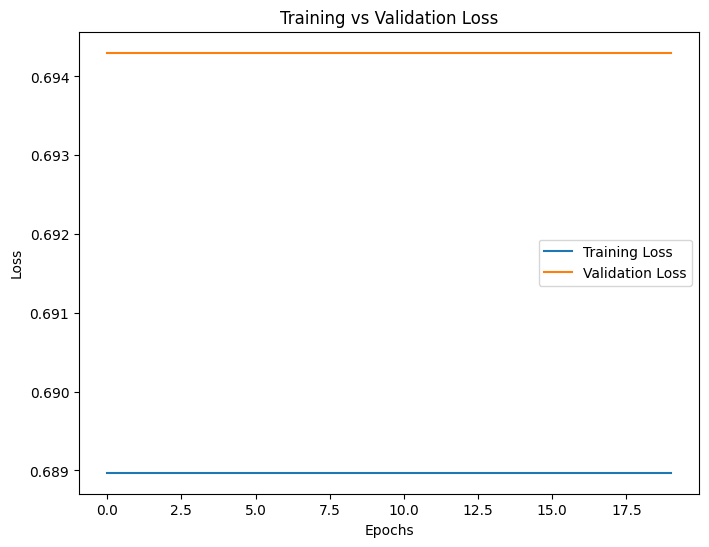

Training Accuracy: 53.12%
Validation Accuracy: 57.00%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Example synthetic dataset (replace with your actual data)
X = np.random.randn(1000, 10)  # 1000 samples, 10 features (replace with actual data)
y = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can help improve performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Get the predicted probabilities (needed for log_loss)
y_train_prob = model.predict_proba(X_train)[:, 1]
y_val_prob = model.predict_proba(X_val)[:, 1]

# Calculate training and validation log loss (cross-entropy loss)
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)

# You can add more epochs if needed, but since LogisticRegression doesn't work with epochs, we just use the results.
train_losses = [train_loss] * 20  # Assume constant loss for simplicity
val_losses = [val_loss] * 20  # Assume constant loss for simplicity

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# You can also check the accuracy of the model
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the phishing dataset (Replace with your correct path)
data = pd.read_csv('/content/phishing_site_urls.csv')  # Adjust file path

# Example feature extraction (replace with real features for URLs)
# Length of URL and presence of certain keywords
data['url_length'] = data['URL'].apply(len)
data['has_https'] = data['URL'].apply(lambda x: 1 if 'https' in x else 0)
data['has_www'] = data['URL'].apply(lambda x: 1 if 'www' in x else 0)

# Assuming 'Label' is the target column (1 = phishing, 0 = legitimate)
X = data[['url_length', 'has_https', 'has_www']]  # Features
y = data['Label']  # Target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

# Print best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the model with best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_train_pred = best_model.predict(X_train_res)
y_val_pred = best_model.predict(X_val)

# Training and Validation Accuracy
train_accuracy = accuracy_score(y_train_res, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print Classification Report and Accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# AUC-ROC
y_val_prob = best_model.predict_proba(X_val)[:, 1]
auc_roc = roc_auc_score(y_val, y_val_prob)
print(f"AUC-ROC: {auc_roc:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Plotting feature importances
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.bar(features, importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plotting training vs validation accuracy (optional)
train_accuracies = [train_accuracy] * 20
val_accuracies = [val_accuracy] * 20

plt.figure(figsize=(8, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/phishing_site_urls.csv'

In [9]:
data = pd.read_csv('C:/path/to/phishing_site_urls.csv')  # Replace with the correct path


FileNotFoundError: [Errno 2] No such file or directory: 'C:/path/to/phishing_site_urls.csv'

In [11]:
data = pd.read_csv('C:/phishing 2/phishing_site_urls.csv')


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assume you already have your dataset (X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # 2 classes for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture training and validation loss
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Access training and validation loss
train_losses = history.history['loss']
val_losses = history.history['val_loss']

# Print the losses for each epoch
for epoch in range(len(train_losses)):
    print(f"Epoch {epoch+1}, Training Loss: {train_losses[epoch]:.4f}, Validation Loss: {val_losses[epoch]:.4f}")


ModuleNotFoundError: No module named 'tensorflow'

In [20]:
import torch
import torch.optim as optim
from torch import nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Assume you already have your dataset (X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# Define your model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 2)  # 2 classes for binary classification
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    # Calculate the average training loss for the epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():  # No gradient calculation for validation
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    # Calculate the average validation loss for the epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print losses for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

# You now have the `train_losses` and `val_losses` for every epoch


ModuleNotFoundError: No module named 'torch'

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier (since it doesn't have iterative steps, we use cross-validation)
model = RandomForestClassifier(n_estimators=100)

# Using cross-validation to get training accuracy
train_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Using cross-validation to get validation accuracy
val_score = cross_val_score(model, X_val, y_val, cv=5, scoring='accuracy')

print(f"Training Accuracy: {train_score.mean():.4f}")
print(f"Validation Accuracy: {val_score.mean():.4f}")


Training Accuracy: 0.7508
Validation Accuracy: 0.7511


Training Accuracy: 0.7508
Validation Accuracy: 0.7510
Time taken for cross-validation: 107.64 seconds


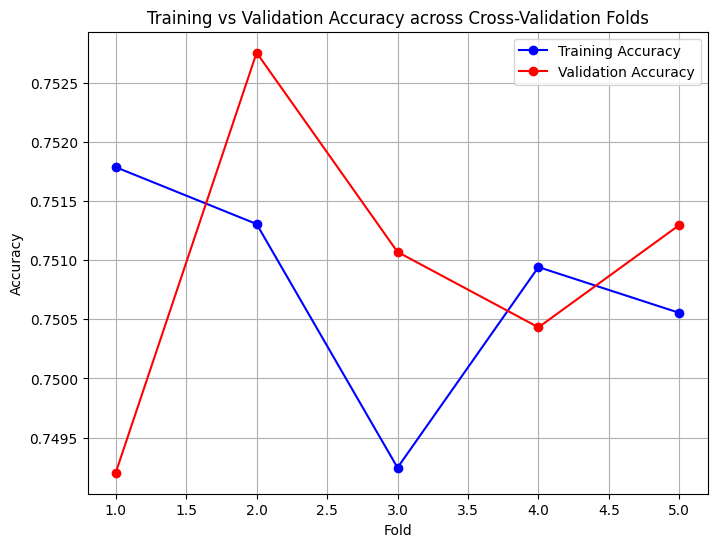

In [22]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100)

# Measure time taken for cross-validation
start_time = time.time()

# Perform cross-validation for training and validation accuracy
train_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
val_score = cross_val_score(model, X_val, y_val, cv=5, scoring='accuracy')

end_time = time.time()

# Print results
print(f"Training Accuracy: {train_score.mean():.4f}")
print(f"Validation Accuracy: {val_score.mean():.4f}")

# Print the time taken
print(f"Time taken for cross-validation: {end_time - start_time:.2f} seconds")

# Plotting the training and validation accuracy
plt.figure(figsize=(8, 6))

# Plot training accuracy
plt.plot(range(1, 6), train_score, label='Training Accuracy', marker='o', color='blue')

# Plot validation accuracy
plt.plot(range(1, 6), val_score, label='Validation Accuracy', marker='o', color='red')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy across Cross-Validation Folds')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


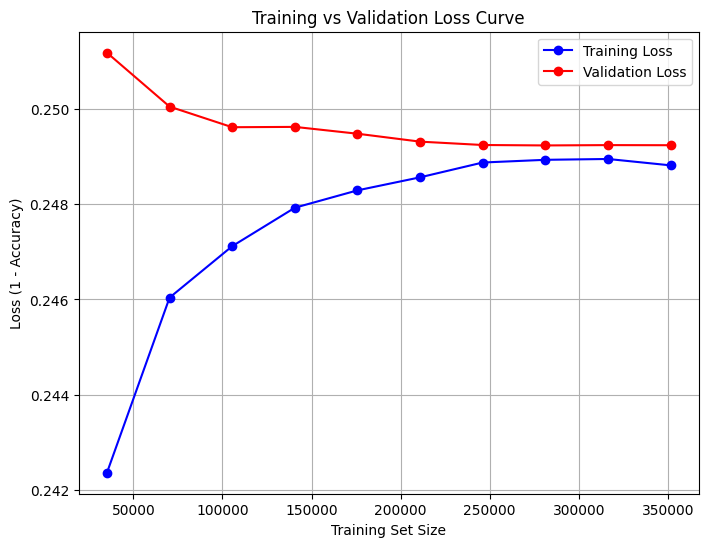

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate training and validation loss
train_loss = 1 - train_scores.mean(axis=1)
val_loss = 1 - val_scores.mean(axis=1)

# Plotting the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, label='Training Loss', marker='o', color='blue')
plt.plot(train_sizes, val_loss, label='Validation Loss', marker='o', color='red')

# Customize the plot
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.title('Training vs Validation Loss Curve')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('training_validation_loss.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
